# Tasks

Machine Learning

Winter 2023/24

by James Connolly (G00232918)

***

## Task 1

> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such
as math. In this task,1 you should write a function sqrt(x) to 1 approximate the square root of a floating point number x without
using the power operator or a package.

> Rather, you should use the initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z{i+1}$ is less than some threshold, say 0.01.

$$ z_{i+1} = z_i - \frac{z_i x z_i - x}{2z_i} $$


In [4]:
def sqrt(x):
    # Initial guess for the square root
    z = 4 /4.0

    # Loop until we are accurate enough
    # while (z could be improved):
    for i in range(100):
        # Newton's method for a better approximation
        z = z - (((z*z)-x)/(2*z))

    # z should now be a good approximation for the square root
    return z

In [5]:
# test the function on 3.
sqrt(3)

1.7320508075688774

In [6]:
# Check Python's value for square root of 3.
3**0.5

1.7320508075688772

In [21]:
### Alertnative answer

def sqrt1(x):

    # Starting point is 'x / 2.0', which is a reasonable estimate based on reference.
    z = x / 2.0
    
    
    # Set a threshold for stop criteria
    # when the difference between consecutive approximations is less than or 
    # equal to this threshold.
    threshold = 0.01

    while True:
        # Use Newton's method to compute a better approximation of the square root.
        z_next = z - ((z * z - x) / (2 * z))
        
        # Check if the absolute difference between the current and next approximation is within the threshold.
        # If it is, we consider 'z_next' to be a good approximation and return it.
        if abs(z_next - z) <= threshold:
            return z_next  
        
        # Update 'z' with the new approximation for the next iteration.
        z = z_next
        

# Test the sqrt1 function on the number 3.
result = sqrt1(3)
print(result)  

# Check with Python Square root operator
python_sqrt = 3**0.5
print(python_sqrt)


1.7320508100147276
1.7320508075688772


Reference - https://www.rookieslab.com/posts/finding-square-root-using-guess-and-check-algorithm-in-python

### Notes

***

1. The calculation $z^2 - x$ is exactly when $z$ is the square root of $x$. It is greater than zero when $z$ is too big. It is less than zero when $z$ is too small. Thus $(z^2 - x)^2$ is a good candidate for a cost function. 
2. The derivate of the numerator $z^2 - x$ with respect to $z$ is $2z$. This is the denominator of the fraction in the formula from the question. 

***
## Task 1 End

## Task 2

> Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they
prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.




In [12]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as ss

# Defining the variables as Categorical
drink = pd.Categorical(['Coffee', 'Tea'], categories=['Coffee', 'Tea']) 
biscuit = pd.Categorical(['Chocolate', 'Plain'], categories=['Chocolate', 'Plain'])  

# converting the data to a NumPy array
data = np.array([[43, 57], [56, 45]])
# Creating the cross tabulation
cross_tab = pd.DataFrame(data, index=drink, columns=biscuit)  

# Performing the chi-squared test
chi2, p, dof, expected = ss.chi2_contingency(cross_tab)

# Output the results
# Chi-squared statistic
print("Chi-squared statistic:", chi2)
# p-value
print("P-value:", p)
# degrees of freedom
print("Degrees of freedom:", dof)
# expected frequency table
print("Expected frequencies table:")
print(expected)


Chi-squared statistic: 2.6359100836554257
P-value: 0.10447218120907394
Degrees of freedom: 1
Expected frequencies table:
[[49.25373134 50.74626866]
 [49.74626866 51.25373134]]


## Conclusion

Based on the provided results, it seems that there is no significant association of the categorical variables being seen, as the p-value is greater than the typical significance level of 0.05.

### References
* How to set up the dataframe for cross tab - https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
* Understanding pd.categorical - https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Categorical.html
* chi square example - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
* Analsying the results of p-value - https://study.com/skill/learn/how-to-interpret-the-p-value-for-the-chi-square-test-for-goodness-of-fit-explanation.html

***
## Task 2 End

# Task 3

> Perform a t-test on the famous penguins dataset to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

In [2]:
import pandas as pd

# read in the dataset to be used.
df = pd.read_csv('data/penguins.csv')

# Show.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
# male body mass
# using the to numpy method to put all the related values into
# an array (to numpy)
sample_a = df[df['sex'] == 'MALE']['body_mass_g'].to_numpy()

sample_a


array([3750., 3650., 4675., 3800., 4400., 4500., 4200., 3600., 3950.,
       3800., 3550., 3950., 3900., 3900., 4150., 3950., 4650., 3900.,
       4400., 4600., 3425., 4150., 4300., 4050., 3700., 3800., 3750.,
       4400., 4050., 3950., 4100., 4450., 3900., 4150., 4250., 3900.,
       4000., 4700., 4200., 3550., 3800., 3950., 4300., 4450., 4300.,
       4350., 4100., 4725., 4250., 3550., 3900., 4775., 4600., 4275.,
       4075., 3775., 3325., 3500., 3875., 4000., 4300., 4000., 3500.,
       4475., 3900., 3975., 4250., 3475., 3725., 3650., 4250., 3750.,
       4000., 3900., 3650., 3725., 3750., 3700., 3775., 4050., 4050.,
       3300., 4400., 3400., 3800., 4150., 3800., 4550., 4300., 4100.,
       3600., 4800., 4500., 3950., 3550., 4450., 4300., 3250., 3950.,
       4050., 3450., 4050., 3800., 3950., 4000., 3775., 4100., 5700.,
       5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300., 5350.,
       5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400., 5250.,
       5350., 5700.,

In [4]:
# female body mass
sample_b = df[df['sex'] == 'FEMALE']['body_mass_g'].to_numpy()

sample_b

array([3800., 3250., 3450., 3625., 3200., 3700., 3450., 3325., 3400.,
       3800., 3800., 3200., 3150., 3250., 3300., 3325., 3550., 3300.,
       3150., 3100., 3000., 3450., 3500., 3450., 2900., 3550., 2850.,
       3150., 3600., 2850., 3350., 3050., 3600., 3550., 3700., 3700.,
       3550., 3200., 3800., 3350., 3500., 3600., 3550., 3400., 3300.,
       3700., 2900., 3725., 3075., 2925., 3750., 3175., 3825., 3200.,
       3900., 2900., 3350., 3150., 3450., 3050., 3275., 3050., 3325.,
       3500., 3425., 3175., 3400., 3400., 3050., 3000., 3475., 3450.,
       3700., 3500., 3525., 3950., 3250., 4150., 3800., 3700., 3575.,
       3700., 3450., 3600., 2900., 3300., 3400., 3700., 3200., 3350.,
       3900., 3850., 2700., 3650., 3500., 3675., 3400., 3675., 3325.,
       3600., 3350., 3250., 3525., 3650., 3650., 3400., 3775., 4500.,
       4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150., 4800.,
       5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950., 4350.,
       3950., 4300.,

In [6]:
import scipy.stats as ss

ss.ttest_ind(sample_a, sample_b)

TtestResult(statistic=8.541720337994516, pvalue=4.897246751596224e-16, df=331.0)

## Conclusion

The t-test tool is similar to a tool thats to figure out if 2 groups are different from each other in a meaningful way. It helps to determine whether any of obsevered differents are probably not just due to random chance.

By using the t-statistic, degrees of freedom and the values from the t-distribution, you can assess the validity of the hypotheses regarding the relationship between the two groups.

A summary of the results are the following - 

T-statistic - 8.54 suggests a signifiant difference in the means of the samples defined. 

P-Value -  The p-value is very small (4.897e-16), indicating strong evidence against the null hypothesis. A small p-value suggests that the observed difference between the two sample means is not likely to be due to random chance.


### References -

* To numpy method - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html
* T-test definition - https://www.investopedia.com/terms/t/t-test.asp


# Task 3 end

# Task 4

Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer. 

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


# read in the data
df = pd.read_csv('data/iris.csv')

# show data
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [46]:
# check for nan values

df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

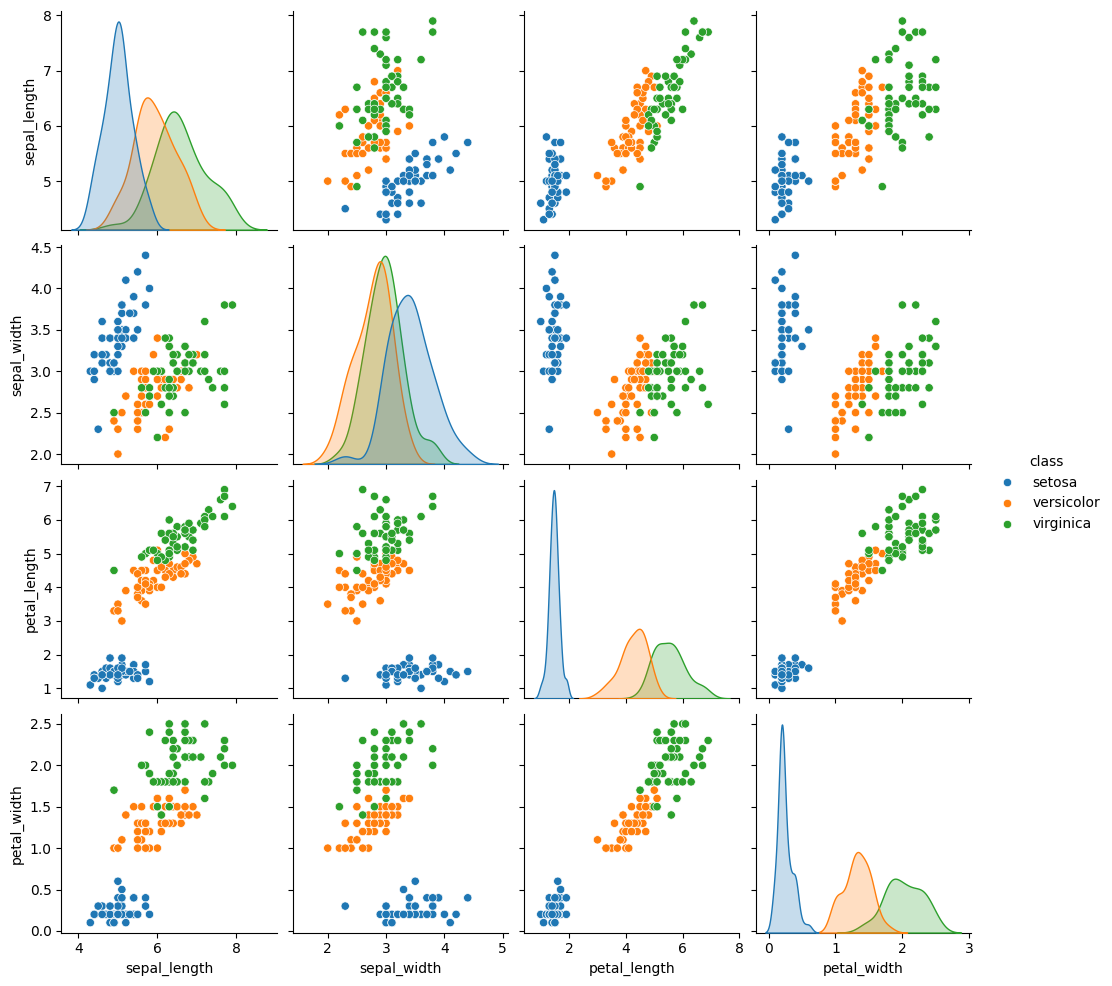

In [47]:
# show the visualisation to see is the difference obvious

sns.pairplot(df, hue="class")
plt.show()


You can see from the scatter plots for each part of Iris flower that the Setosa is distintively smaller when compared with the classes. This leads us to describe results that will demonstrate how the scatter plots are showing. 

In [48]:
# To check is the setosa easy to separate I wil use the K nearest neighbours algorithm.

# Firstly define the X-values.

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
# Y values

y = df['class']

y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [50]:
# create the new instance for the classifier
clf = sk.neighbors.KNeighborsClassifier()
clf.fit(X,y)

KNeighborsClassifier()

In [51]:
KNeighborsClassifier()

KNeighborsClassifier()

In [52]:
# check the classifier is working

clf.predict(X.iloc[:1])

array(['setosa'], dtype=object)

In [53]:
# check the output of the first sample
y.iloc[0]


'setosa'

In [54]:
# Point a.
a = X.iloc[0]

# Show a.
a

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [55]:
# point b
b = X.iloc[1]

# Show b
b

sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Name: 1, dtype: float64

In [56]:
# Distance (Euclidean distance - Pythagoras theorem).
((b - a)**2).sum()**0.5


0.5385164807134502

In [57]:
# Ask the classifier to predict the outputs for the training set inputs.
# (Usually a bad idea.)

clf.predict(X)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
     

In [58]:
# Compare to the expected outputs.
clf.predict(X) == y

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: class, Length: 150, dtype: bool

In [59]:
# count of incorrect values (true becomes 1 and false become 0)
X.shape[0] - (clf.predict(X) == y).sum()

5

In [60]:
# correct proportion
(clf.predict(X) == y).sum() / X.shape[0]

0.9666666666666667

In [61]:
# Keep some samples back for testing, train on the others.
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y)

In [62]:
# Training inputs (randomly selected).
X_train

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
67,5.8,2.7,4.1,1.0
8,4.4,2.9,1.4,0.2
133,6.3,2.8,5.1,1.5
3,4.6,3.1,1.5,0.2
...,...,...,...,...
90,5.5,2.6,4.4,1.2
149,5.9,3.0,5.1,1.8
45,4.8,3.0,1.4,0.3
61,5.9,3.0,4.2,1.5


In [63]:
# Training outputs (randomly selected).
y_train

118     virginica
67     versicolor
8          setosa
133     virginica
3          setosa
          ...    
90     versicolor
149     virginica
45         setosa
61     versicolor
5          setosa
Name: class, Length: 112, dtype: object

In [64]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
# predict on test set
clf.predict(X_test)

array(['versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica'], dtype=object)

In [66]:
(clf.predict(X_test) == y_test).sum() / X_test.shape[0]


0.9473684210526315

In [67]:
# Get the setosa data from the data set (first 50 rows)
df_setosa = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].head(50)

df_setosa

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [68]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(X_train, y_train)

# Predict based on setosa test set.
predictArray = clf.predict(df_setosa)
predictArray

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa'], dtype=object)

In [70]:
# Cross Validation
# numpy reference
unique_values, counts = np.unique(predictArray, return_counts=True)
# occurences = predictArray.count("setosa")
counts

array([50], dtype=int64)

## Conclusion

The K-nearest Neighbor (K-NN) algorithm, is a powerful maching learning technique employed both classification and regression tasks, based on the premise that data points that have close similarities. It works better on smaller datasets as it has the trait where it can overfit. When the algorithm relies on data points that has similarities it is important to run the cross validation to ensure you are getting accurate results that yyou base your findings on. (IBM)

From this study on the Iris dataset, the KNN algoritm was used to explore the distivetiveness of the Setosa class in comparios to the other classes. The plots at the beginning gave us a good indication that the Setosa was different so it was about confirming this.

KNN was used to classify each record in the dataset and in the end it gave accurate results. After training the classifirt with 112 rows of the dataset, it reurnted the classification accuracy of 96%. Particularly the perfection classifiction rate of 100% when the classifier was employed to catergorise all 50 Setosa records. So after the testing, the KNN algorithm works well to show the difference for the Setosa class in the Iris dataset. 


## References

* https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point
* https://numpy.org/doc/stable/reference/generated/numpy.unique.html
* Lecture notes for code implementation